In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from fiona.crs import from_epsg
from shapely.geometry import Point

# Background questions with a random sample of 10 parks from across the five boroughs

* Reads a shapefile of all city parks
* Reads a csv of park information for the 10 randomly sampled parks
* Reads a csv of parks joined to athletic facility information
* Reads neighborhood specific park information csvs: Long Island City (lic), Bushwick (bushwick), and Bay Street (bay).

In [2]:
parks= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\NYC_PARKS_DATA\NYCPARKS_ALLSITES.shp")

In [3]:
parkevents= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\Events by Park\events_by_park_190607.shp")

In [4]:
geo_events= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\Mapped Events\park_events_190514_alldata.shp")
#Mapped events

In [5]:
events= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\eventorg.csv",index_col=0)
#Dataframe with all events (descriptive categories, locations, and event organizers)

In [6]:
sample= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Sample\sample.csv",index_col=0)
#This is the random sample of 10 parks.

In [7]:
athl= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Park Shapefiles (Alternative)\190610_parks with athletic facilities_JG\parksathl.csv")
#These are all parks with listed athletic facilities.

In [8]:
allparksnum= parks.shape[0]
#Number of all parks in the city

In [9]:
sample.shape
#Number of all parks in the sample

(10, 61)

In [10]:
sample.head(3)

,GISPROPNUM,LOCATION,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,ACRES,ADDRESS,SIGNNAME,...,shape_stle,surface_ty,t_ball,tennis,track_and,volleyball,wheelchair,youth_foot,zipcode,geometry_y
4872,X092,"NYC - Westchester County Line, Van Cortlandt P...","207, 208, 212",11,50,"10467, 10470, 10471, 10705, 10705",X,1146.430,3545 JEROME AVENUE,Van Cortlandt Park,...,231.416676,Asphalt,No,Yes,No,No,No,No,10470,POLYGON ((-73.87947955710231 40.89608878033186...
4657,B431,"Furman St.,Water St. and John St. bet. Atlanti...","302, 306","1,33",84,"11201, 11201, 11201, 11201, 11201",B,21.377,NaN,Brooklyn Bridge Park,...,269.152299,Concrete,No,No,No,No,No,No,11201,POLYGON ((-73.99881091304688 40.69935116278221...
5202,M028,"Riverside Dr., Hudson River, W. 155 St. to Dyc...",112,"7,10",33,"10032, 10033, 10034",M,184.143,NaN,Fort Washington Park,...,179.393409,Asphalt,No,No,No,Yes,No,No,10032,POLYGON ((-73.94828728648881 40.83907853345003...


In [11]:
sample[['SIGNNAME','ACRES']].sort_values('ACRES',ascending=False)

,SIGNNAME,ACRES
4872,Van Cortlandt Park,1146.430
81,Franklin D. Roosevelt Boardwalk and Beach,644.350
5202,Fort Washington Park,184.143
3674,John V. Lindsay East River Park,45.880
4657,Brooklyn Bridge Park,21.377
1684,Rochdale Park,8.833
3329,Beach 9 Playground,4.863
3212,Murray Playground,2.524
5837,Harlem Lane Playground,1.635
2553,Hollis Playground,0.980


The above table shows all parks included in this 10-park sample. The parks range from Van Cortlandt Park with 1146.43 acres to Hollis Playground with 0.980 acres.

In [12]:
events['GISPROPNUM']=events['park_id']
sampevents= pd.merge(events,sample,on='GISPROPNUM',how='right')

In [13]:
name= sample[['SIGNNAME','ACRES']].iloc[0,0]
acres= sample[['SIGNNAME','ACRES']].iloc[0,1]

In [14]:
t= events.sample(3)

In [15]:
t

,event_id,title,date,start_time,end_time,location_description,description,snippet,phone,email,...,Location Name,park_id,lat,long,address,zip,borough,accessible,event_organizer,GISPROPNUM
225339,122925,Ed Center Open Hours,03/05/2016,13:00,17:00,Located at 99 Plymouth in the Main Street sect...,"<p>The Ed Center is open for free, drop-in hou...",Get to know Brooklyn Bridge Park with our 250-...,NaN,ephillips@brooklynbridgepark.org,...,Environmental Education Center,B431,40.704287,-73.989384,NaN,NaN,B,1.0,Brooklyn Bridge Park Conservancy,B431
158496,112636,Learn to Play Tennis: Intermediates,07/29/2015,09:00,12:00,NaN,"<p>CityParks Tennis, presented by BNP Paribas,...","CityParks Tennis, presented by BNP Paribas, pr...",(718) 760-6999,NaN,...,West 242nd Street and Broadway,X092,40.889301,-73.898201,NaN,10463.0,X,NaN,City Parks Foundation,X092
182895,109312,Alley Pond Park Adventure Course: Free Public ...,06/28/2015,09:30,12:00,NaN,<p>The Alley Pond Park Adventure Course offers...,The Alley Pond Park Adventure Course offers fr...,(718) 217-4685,NaN,...,Alley Pond Park Adventure Center,Q001,40.742607,-73.741072,NaN,11363.0,Q,1.0,Urban Park Rangers,Q001


In [16]:
t.columns

Index(['event_id', 'title', 'date', 'start_time', 'end_time',
       'location_description', 'description', 'snippet', 'phone', 'email',
       'cost_free', 'cost_description', 'must_see', 'url', 'notice',
       'category', 'Location Name', 'park_id', 'lat', 'long', 'address', 'zip',
       'borough', 'accessible', 'event_organizer', 'GISPROPNUM'],
      dtype='object')

In [17]:
t[['cost_free','cost_description','must_see','url','notice','category','Location Name']]

,cost_free,cost_description,must_see,url,notice,category,Location Name
225339,1,NaN,0,ed-center-open-hours,0,Best for Kids,Environmental Education Center
158496,1,NaN,0,learn-to-play-tennis-intermediates,0,Sports,West 242nd Street and Broadway
182895,1,NaN,0,alley-pond-park-adventure-course-free-public-s...,0,Education,Alley Pond Park Adventure Center


In [18]:
events[events['event_id']==148523]['category']

228683                    Accessible
228684                       Fitness
228685    Historic House Trust Sites
228686                    Waterfront
228687               Outdoor Fitness
Name: category, dtype: object

In [19]:
perms= pd.read_csv(r'M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\Parks Historical Permits\190618_ParksPermits_ADDCOLS.csv',low_memory=False,index_col=0)

In [20]:
y= perms.sample(3)

In [21]:
y.columns

Index(['community_board', 'end_date_time', 'event_agency', 'event_borough',
       'event_id', 'event_location', 'event_name', 'event_street_side',
       'event_type', 'police_precinct', 'start_date_time',
       'street_closure_type', 'year', 'start_time', 'end_time', 'date', 'dow',
       'event_clean', 'park_short', 'BOROUGH', 'park_clean', 'GISPROPNUM',
       'TYPECATEGO'],
      dtype='object')

In [22]:
y

,community_board,end_date_time,event_agency,event_borough,event_id,event_location,event_name,event_street_side,event_type,police_precinct,...,start_time,end_time,date,dow,event_clean,park_short,BOROUGH,park_clean,GISPROPNUM,TYPECATEGO
134149,"14,",2014-08-06 20:00:00,Parks Department,Queens,167876,Beach 17 Playground (O'Donohue Park): Beach 17...,Miscellaneous,NaN,Special Event,"101,",...,19:00:00,20:00:00,2014-08-06,2,miscellaneous,Beach 17 Playground,Q,beach 17 playground q,NaN,NaN
194109,"64,",2018-08-14 12:00:00,Parks Department,Manhattan,414626,Central Park: Rudin Playground Lawn,Soccer Shots,NaN,Special Event,"22,",...,09:00:00,12:00:00,2018-08-14,1,soccer shots,Central Park,M,central park m,M010,Flagship Park
158915,"11,",2016-07-26 19:00:00,Parks Department,Manhattan,295700,Randall's Island Park: East River Waterfront P...,Barbecue,NaN,Special Event,"25,",...,11:00:00,19:00:00,2016-07-26,1,barbecue,Randall's Island Park,M,randall's island park m,M104,Flagship Park


In [23]:
perms['street_closure_type'].value_counts()

Full Street Closure             860
Curb Lane Only                   22
Sidewalk and Street Closure       4
Pedestrian Plaza                  3
Full Sidewalk Closure             3
Partial Sidewalk Closure          2
Name: street_closure_type, dtype: int64

# Basic analysis of events and programming at each of the 10 parks
The structure is as follows:
* isolate the sample in a temporary dataframe
* determine the year of the events
* compute the number of events in total by the event_id
* compute the average number of events per year, the total number of events per year, and the average number of uniquely titled events per year
* compute the number of events that occur more than once (both average and specific numbers by year)
* display these results in a table and a bar graph
* display the most frequently used categories in a table and graph
* scan the events at the park, and look at the most frequently occuring events in the first and last years
* analyze the stakeholders: who are they and are there a significant number of local stakeholders?

1 {{name}}

In [24]:
t= sampevents[sampevents['GISPROPNUM']==sample.iloc[0,0]]
t['date']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t['year']= t['date'].dt.year
t= t[t['year']!=2019]
numev= t[~t.duplicated('event_id')].shape[0] #Number of events by the unique event id.
#Creates a temporary dataframe for all events located to the specific park.

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().mean()
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).mean(axis=0)
#Counts the number of uniquely titled events

In [26]:
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[[2013,2014,2015,2016,2017,2018]]>1].count().reset_index()
duplevavg= y[y[[2013,2014,2015,2016,2017,2018]]>1].count().mean()
duplev13= duplev.iloc[0,1]
duplev18= duplev.iloc[5,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

The first park in this sample is {{name}}. {{name}} has {{acres}} acres. The number of events it hosts on average per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. On average per year it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. Of these uniquely titled events, {{np.around(duplevavg,decimals=2)}} are repeating events on average. To be specific, in 2013 there were {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in 2018 there were {{duplev18}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [27]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year

,year,0
0,2013,76
1,2014,86
2,2015,118
3,2016,99
4,2017,68
5,2018,66


In [28]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2013,204
1,2014,251
2,2015,277
3,2016,196
4,2017,203
5,2018,224


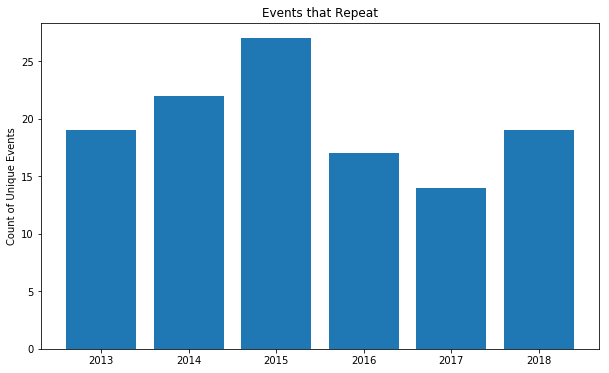

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
bars= duplev['year']
ypos= range(0,len(bars))
ax.bar(ypos,duplev[0])
plt.title('Events that Repeat')
plt.xticks(ypos,bars)
plt.ylabel('Count of Unique Events')
plt.show();

In [30]:
uniqev= t[~t.duplicated('title')][['year','title','description','cost_free','event_organizer']].sort_values('title').shape

In [31]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)
table.shape

(72, 2)

* Top ten categories used to describe events (above)
* Bar chart of all categories used to describe events (below)

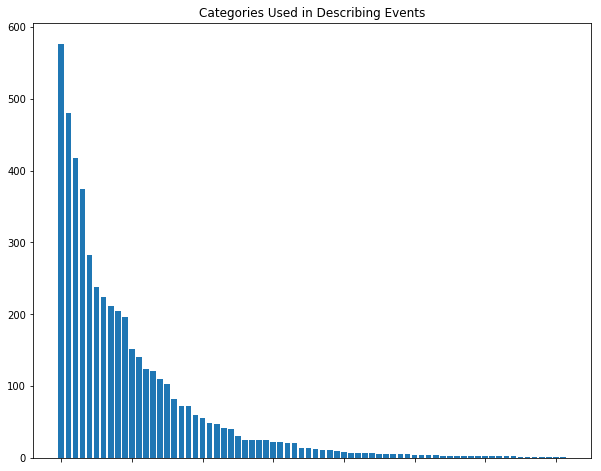

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom=False)
plt.title('Categories Used in Describing Events')
plt.show();

In [33]:
table;
table.iloc[5,0]

'Birding'

By title, there are {{uniqev[0]}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. As the table above demonstrates, most of these events fall under the descriptive categories: {{table.iloc[0,0]}}, {{table.iloc[1,0]}}, {{table.iloc[2,0]}}, {{table.iloc[3,0]}}, {{table.iloc[4,0]}}, {{table.iloc[5,0]}}, {{table.iloc[6,0]}}, and {{table.iloc[7,0]}}.

In [34]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
9227,2013,67293.0,"""Adventures in Time"" Summer History Camp",<p>\tVan Cortlandt House Museum invites childr...,A week long adventure to the 18th century at V...
10165,2013,77081.0,A Conversation with General George Washington,Come visit and speak to George Washington as h...,Come visit and speak to George Washington as h...
9976,2013,77108.0,Astronomy,<p>\tOur Urban Park Rangers will be your guide...,Our Urban Park Rangers will be your guides to ...
10190,2013,75770.0,Barefoot Dancing: East Coast Hula (Hawaiian),<p>\tEnchant yourself with lovely hula dancers...,East Coast Hula spectacular with beautiful isl...
9217,2013,75769.0,Barefoot Dancing: Ebony Hillbillies (African-A...,The Ebony Hillbilles<br /><div></div><div>\tAs...,As one of the last blackstring bands in the U....
8847,2013,75772.0,Barefoot Dancing: Greek American Folklore Society,<div>\tThe Greek-American Folklore Society is ...,The Greek-American Folklore Society is dedicat...
8522,2013,76086.0,Barefoot Dancing: Keito Academy (Chinese Lion ...,Learn to dance and move like a Chinese Lion.,Learn to dance and move like a Chinese Lion.
8010,2013,76087.0,Barefoot Dancing: Salsafest,Be a part of Bronx Salsafest with the Lorenz L...,Be a part of Bronx Salsafest with the Lorenz L...
9681,2013,74431.0,Basic Canoeing,<p>\tOur trained Urban Park Rangers will lead ...,Our trained Urban Park Rangers will lead you o...
10364,2013,76698.0,Bike Bonanza,"Bike swap, helmet giveaways, and learn-to-ride...","Bike swap, helmet give-aways, and learn-to-rid..."


In [35]:
y2013= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2013,axis=1,ascending=False).iloc[0,0:10]
y2013= y2013.reset_index()
y2013

,title,2013
0,Bird Walks,42.0
1,Van Cortlandt Track Club Saturday Morning Grou...,31.0
2,CityParks Seniors Fitness: Walking,13.0
3,CityParks Seniors Fitness: Yoga,13.0
4,"""Adventures in Time"" Summer History Camp",12.0
5,Birding,5.0
6,Wilderness Survival,3.0
7,Van Cortlandt Park Ice Skating Rink Opening We...,3.0
8,A Conversation with General George Washington,3.0
9,Basic Canoeing,3.0


In [36]:
y2018= t[~t.duplicated('event_id')]['title'].value_counts()
y2018

Bird Walks                                                                    107
Nature Center Adventures                                                       84
Van Cortlandt Track Club                                                       40
Bird Walk with NYC Audubon                                                     36
Van Cortlandt Track Club Saturday Morning Group-Run                            31
CityParks Seniors Fitness: Free Yoga, Tennis & Fitness Walking Instruction     31
Bird Walks at Van Cortlandt Park                                               30
CityParks Seniors Fitness: Yoga                                                30
CityParks Seniors Fitness: Walking                                             30
History of the Holidays at Van Cortlandt House                                 27
Seniors Fitness in Van Cortlandt Park                                          25
Adventures in Time Summer History Camp                                         24
Barefoot Dancing

Park events range from "Arts, Culture & Fun," a theme that seems to have different engagement strategies for young people, to a Zumba Fitness class. In 2013, the events that repeated the most were {{y2013.iloc[0,0]}}, {{y2013.iloc[1,0]}}, and {{y2013.iloc[2,0]}} as well as {{y2013.iloc[3,0]}}. In 2018, {{y2018.iloc[2,0]}} were less frequent--only the third most frequent activity. Rather, {{y2018.iloc[0,0]}} and {{y2018.iloc[1,0]}} were the two most frequent. Overall, these tables suggest that most activities at Van Cortlandt Park take advantage of its natural surroundings. They're overwhelmingly related to fitnes and nature observation (e.g. birding or 'nature center adventures').

In [37]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table.head(10)
#Stakeholders by number of uniquely titled events organized

,index,event_organizer
0,Urban Park Rangers,127
1,Van Cortlandt Park Conservancy,64
2,City Parks Foundation,29
3,Van Cortlandt House Museum,18
4,Friends of Van Cortlandt Park,18
5,NYC Parks: Bronx Recreation,14
6,Bike New York,8
7,Stewardship Team,7
8,New York Road Runners,7
9,NYC Parks,4


In [38]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2.head(10)
#Stakeholders by number of events organized

,index,event_organizer
0,Van Cortlandt Park Conservancy,370
1,Urban Park Rangers,335
2,City Parks Foundation,196
3,Van Cortlandt House Museum,115
4,Friends of Van Cortlandt Park,49
5,New York City Audubon,30
6,Bike New York,22
7,NYC Parks: Bronx Recreation,15
8,Stewardship Team,13
9,Van Cortlant Park Conservancy,13


The most prominent event organizers appear to have some relationship to {{name}}. {{table.iloc[0,0]}} organized {{table.iloc[0,1]}} uniquelytitled events (this number increases if we take into account repeats across years). {{table.iloc[1,0]}}, {{table.iloc[3,0]}}, and {{table.iloc[4,0]}} stand out as well and have a clear relationship to {{name}}. However, {{table.iloc[2,0]}}, {{table.iloc[6,0]}}, and {{table.iloc[7,0]}} are city-wide organizations. In particular, {{table.iloc[6,0]}} and the {{table.iloc[7,0]}} speak to the presence of hiking trails at {{name}}.

* Local vs. nonlocal analysis.

In [39]:
nonloc= [1,2,5,6,9,12,13,14,15,16,18,20,21,22,25,26,27,28,29] #based off of organizations that do not have Van Cortlandt Park in their name
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= len(table2)

* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev[0]/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share is by all events organized, not uniquely titled events.

In [40]:
id= sample[['GISPROPNUM','SIGNNAME','ACRES']].iloc[0,0]
id

'X092'

In [41]:
parks[parks['GISPROPNUM']==id]['TYPECATEGO']

1481    Flagship Park
Name: TYPECATEGO, dtype: object

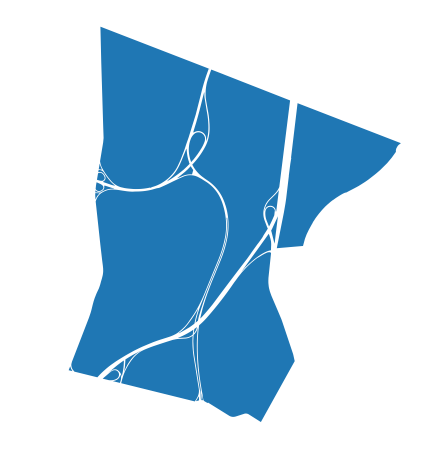

In [42]:
parks[parks['GISPROPNUM']==id].plot(figsize=(8,8))
plt.axis('off')
plt.savefig(r"M:\NY4P Metrics Research 18034\05_GRAPHICS\Charts Graphs Diagrams\park shapes\vancort.pdf");

In [43]:
name= sample[['SIGNNAME','ACRES']].iloc[1,0]
acres= sample[['SIGNNAME','ACRES']].iloc[1,1]
id= sample[['GISPROPNUM','SIGNNAME','ACRES']].iloc[1,0]

In [44]:
id

'B431'

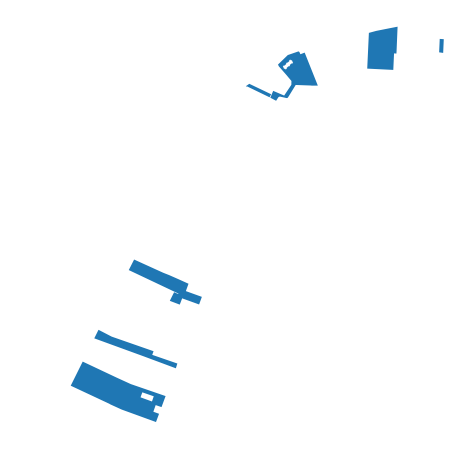

In [45]:
parks[parks['GISPROPNUM']==id].plot(figsize=(8,8))
plt.axis('off')
plt.savefig(r"M:\NY4P Metrics Research 18034\05_GRAPHICS\Charts Graphs Diagrams\park shapes\fortwash.pdf");

## 2 {{name}}

In [46]:
t= sampevents[sampevents['GISPROPNUM']==sample.iloc[1,0]]
t['date']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t['year']= t['date'].dt.year
t= t[t['year']!=2019]
numev= t[~t.duplicated('event_id')].shape[0]
#Creates a temporary dataframe for all events located to the specific park.

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().mean()
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).mean(axis=0)
#Counts the number of uniquely titled events

In [48]:
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[[2013,2014,2015,2016,2017,2018]]>1].count().reset_index()
duplevavg= y[y[[2013,2014,2015,2016,2017,2018]]>1].count().mean()
duplev13= duplev.iloc[0,1]
duplev18= duplev.iloc[5,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

The second park in this sample is the {{name}}. The {{name}} has {{acres}} acres. The number of events it hosts on average per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. On average per year it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. Of these uniquely titled events, {{np.around(duplevavg,decimals=2)}} are repeating events on average. To be specific, in 2013 there were {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in 2018 there were {{duplev18}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [49]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year

,year,0
0,2013,80
1,2014,54
2,2015,73
3,2016,101
4,2017,61
5,2018,5


In [50]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2013,291
1,2014,274
2,2015,295
3,2016,605
4,2017,546
5,2018,43


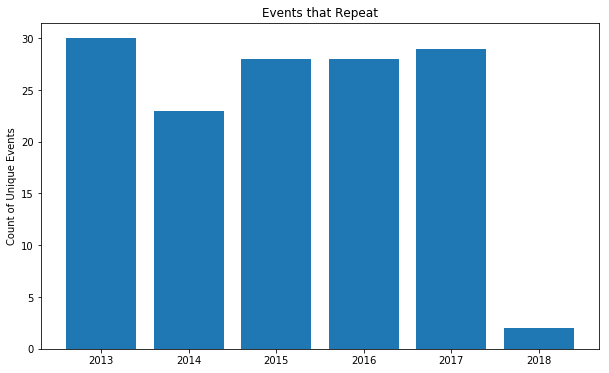

In [51]:
fig, ax = plt.subplots(figsize=(10,6))
bars= duplev['year']
ypos= range(0,len(bars))
ax.bar(ypos,duplev[0])
plt.title('Events that Repeat')
plt.xticks(ypos,bars)
plt.ylabel('Count of Unique Events')
plt.show();

In [52]:
uniqev= t[~t.duplicated('title')][['year','title','description','cost_free','event_organizer']].sort_values('title').shape
#Computes the unique titles across all the years

In [53]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)

,index,category
0,Fitness,561
1,Waterfront,474
2,Best for Kids,447
3,Nature,389
4,Outdoor Fitness,387
5,Sports,355
6,Education,296
7,Arts & Crafts,277
8,Art,233
9,Tours,189


C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


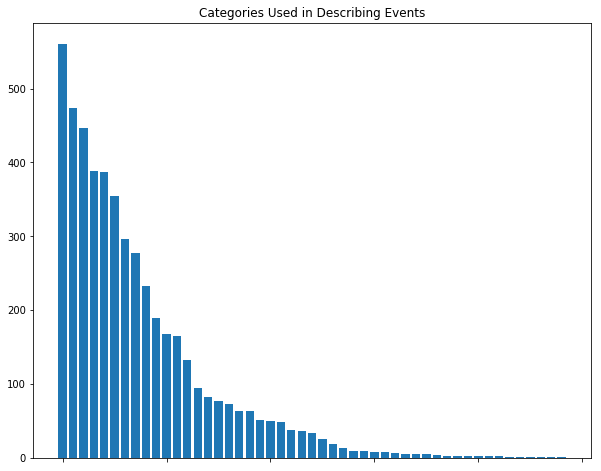

In [54]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom='off')
plt.title('Categories Used in Describing Events')
plt.show();

In [55]:
table.iloc[0,0]

'Fitness'

By title, there are {{uniqev[0]}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. As the table above demonstrates, most of these events fall under the descriptive categories: {{table.iloc[0,0]}}, {{table.iloc[1,0]}}, {{table.iloc[2,0]}}, {{table.iloc[3,0]}}, {{table.iloc[4,0]}}, and {{table.iloc[5,0]}}.

In [56]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
3199,2013,74605.0,28th Annual International Coastal Cleanup Day,Team up with thousands of other volunteers acr...,Team up with thousands of other volunteers acr...
6503,2013,73750.0,A Midsummer Night's Dream,<p>\tTheater 2020 returns to Brooklyn Bridge P...,Theater 2020 returns to Brooklyn Bridge Park f...
2764,2013,73921.0,Adult Volleyball Clinic,Brush up on your volleyball skills with coachi...,Brush up on your volleyball skills with coachi...
2860,2013,74013.0,Arteries of a Nation by Renegade Performance G...,"<p dir=""ltr"">\tBrooklyn-based <a href=""http://...",Brooklyn-based Renegade Performance Group pres...
7162,2013,77168.0,Astronomy,<p>\tOur Urban Park Rangers will be your guide...,Our Urban Park Rangers will be your guides to ...
5860,2013,73988.0,Belly Dance Aerobics with Dodge YMCA,<p>\tDance to Middle Eastern rhythms while lea...,Dance to Middle Eastern rhythms while learning...
4917,2013,74567.0,"Birds, Bugs, Bees Tour",<p>\tLearn the secrets of insect-hunting in Br...,Learn the secrets of insect-hunting in Brookly...
5421,2013,71635.0,Bloom and Bugs,We will walk through the three-year old Brookl...,Explore the flora and fauna that have come to ...
4628,2013,73973.0,Books Beneath the Bridge,Our 2nd annual literature series returns to th...,Our literature series returns to the Granite P...
5119,2013,75920.0,Brooklyn Hip-Hop Festival Family Day,<p>\tThe 9th Annual Brooklyn Hip-Hop Festival ...,"Family Day is a good old fashioned, pop the sp..."


In [57]:
y2013= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2013,axis=1,ascending=False).iloc[0,0:10]
y2013= y2013.reset_index()
y2013

,title,2013
0,Kayaking,26.0
1,Green Team,22.0
2,Kids Create!,15.0
3,Sunset Pilates,15.0
4,Pilates Fitness Guru,14.0
5,Photoville,12.0
6,Journey to the Stars,12.0
7,Outdoor Strength,11.0
8,CANCELLED: Kids Create!,9.0
9,Syfy Movies With a View 2013,9.0


In [58]:
y2018= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2018,axis=1,ascending=False).iloc[5,0:10]
y2018= y2018.reset_index()
y2018

,title,2018
0,NYRR Open Run: Brooklyn Bridge Park,31.0
1,TIDES,9.0
2,"Exhibition Tour: Griselda San Martin, The Wall",1.0
3,Historic New York: Brooklyn Bridge,1.0
4,The Art and Literature of the Brooklyn Bridge,1.0
5,28th Annual International Coastal Cleanup Day,NaN
6,A Midsummer Night's Dream,NaN
7,Abolition on the Water,NaN
8,Adult Volleyball Clinic,NaN
9,All the Park's A Stage: The Winter's Tale,NaN


Park events range from an adult volleyball clinic to "Wednesday Night Tours," a theme that seems solidly institutionalized in {{name}} events. In 2013, the events that repeated the most were {{y2013.iloc[0,0]}}, {{y2013.iloc[1,0]}}, and {{y2013.iloc[2,0]}} as well as {{y2013.iloc[3,0]}}. In 2018, almost none of these events appear in the most frequent. Rather, {{y2018.iloc[0,0]}}, {{y2018.iloc[1,0]}}, {{y2018.iloc[2,0]}}, {{y2018.iloc[3,0]}}, and {{y2018.iloc[4,0]}} were top five most frequent. Overall, these tables suggest that most activities at {{name}} take advantage of the fitness equipment or are more cultural--perhaps a Shakespeare play or a movie at night.

In [59]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table.head(10)
#Stakeholders by uniquely titled events

,index,event_organizer
0,Brooklyn Bridge Park Conservancy,188
1,Brooklyn Bridge Park,70
2,Urban Park Rangers,5
3,City Parks Foundation,5
4,NY Laughs,2
5,NYC Wildflower Week,2
6,United Photo Industries,1
7,More Art,1
8,NYC Urban Field Station,1
9,BRIC,1


In [60]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2.head(10)
#Stakeholders by number of events organized

,index,event_organizer
0,Brooklyn Bridge Park Conservancy,1332
1,Brooklyn Bridge Park,479
2,City Parks Foundation,9
3,Urban Park Rangers,9
4,NYC Wildflower Week,2
5,NY Laughs,2
6,NYC Urban Field Station,1
7,More Art,1
8,United Photo Industries,1
9,BRIC,1


The top two event organizers appear to have some relationship to {{name}}. {{table.iloc[0,0]}} has organized {{table.iloc[0,1]}} unique events. {{table.iloc[1,0]}} has organized {{table.iloc[1,1]}} unique events. Aside from the {{table.iloc[9,0]}}, the other stakeholders seem to be more generic, city-wide organizations: {{table.iloc[2,0]}}, {{table.iloc[3,0]}}, {{table.iloc[4,0]}}, {{table.iloc[2,0]}}, and {{table.iloc[7,0]}} are city-wide organizations. At the same time, {{table.iloc[6,0]}} does suggest that there is a mix of parks organizations and Brooklyn-specific arts organizations.

* Local vs. nonlocal analysis.

In [61]:
nonloc= [2,3,4,5,7,8,9] #based off of organizations that are not connected to Brooklyn
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= np.around(len(table2),decimals=2)

* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev[0]/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [62]:
name= sample[['SIGNNAME','ACRES']].iloc[2,0]
acres= sample[['SIGNNAME','ACRES']].iloc[2,1]

In [63]:
id= sample[['GISPROPNUM','SIGNNAME','ACRES']].iloc[2,0]
id

'M028'

In [64]:
parks[parks['GISPROPNUM']==id]

,GISPROPNUM,LOCATION,COMMUNITYB,COUNCILDIS,PRECINCT,ZIPCODE,BOROUGH,ACRES,ADDRESS,SIGNNAME,TYPECATEGO,WATERFRONT,NYS_ASSEMB,NYS_SENATE,US_CONGRES,geometry
1546,M028,"Riverside Dr., Hudson River, W. 155 St. to Dyc...",112,"7,10",33,"10032, 10033, 10034",M,184.143,None,Fort Washington Park,Community Park,Yes,71,31,13,(POLYGON ((1002894.760926798 256019.4082863033...


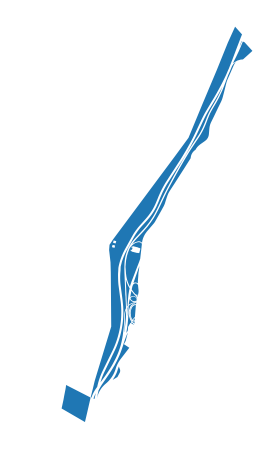

In [65]:
parks[parks['GISPROPNUM']==id].plot(figsize=(8,8))
plt.axis('off')
plt.savefig(r"M:\NY4P Metrics Research 18034\05_GRAPHICS\Charts Graphs Diagrams\park shapes\fortwash.pdf");

## 3 {{name}}

In [66]:
t= sampevents[sampevents['GISPROPNUM']==sample.iloc[2,0]]
t['date']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t['year']= t['date'].dt.year
numev= t[~t.duplicated('event_id')].shape[0]
#Creates a temporary dataframe for all events located to the specific park.

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().mean()
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).mean(axis=0)
#Counts the number of uniquely titled events

In [68]:
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[[2013,2014,2015,2016,2017,2018]]>1].count().reset_index()
duplevavg= y[y[[2013,2014,2015,2016,2017,2018]]>1].count().mean()
duplev13= duplev.iloc[0,1]
duplev18= duplev.iloc[5,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

The second park in this sample is {{name}}. {{name}} has {{acres}} acres. 
* The average number of events it hosts per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. 
* On average per year, it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. 
* Of these uniquely titled events, the average number of events that repeat is {{np.around(duplevavg,decimals=2)}}. 

To be specific, in 2013 there was {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in 2018 there were {{duplev18}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [69]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year

,year,0
0,2013,7
1,2014,5
2,2015,7
3,2016,6
4,2017,6
5,2018,7


In [70]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2013,8
1,2014,6
2,2015,8
3,2016,8
4,2017,6
5,2018,7


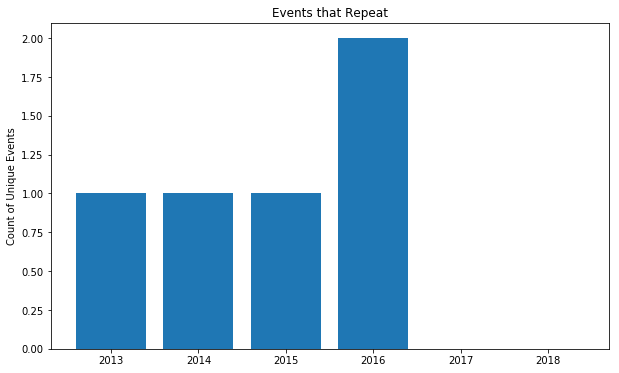

In [71]:
fig, ax = plt.subplots(figsize=(10,6))
bars= duplev['year']
ypos= range(0,len(bars))
ax.bar(ypos,duplev[0])
plt.title('Events that Repeat')
plt.xticks(ypos,bars)
plt.ylabel('Count of Unique Events')
plt.show();

In [72]:
uniqev= t[~t.duplicated('title')][['year','title','description','cost_free','event_organizer']].sort_values('title').shape
#Computes the unique titles across all the years

In [73]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)

,index,category
0,Best for Kids,43
1,History,41
2,Waterfront,39
3,Urban Park Rangers,35
4,Education,34
5,Festivals,33
6,Tours,30
7,Summer on the Hudson,29
8,Fishing,25
9,Nature,23


C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


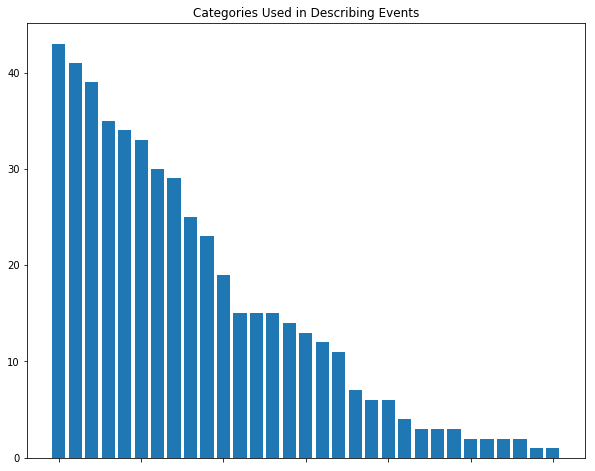

In [74]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom='off')
plt.title('Categories Used in Describing Events')
plt.show();

In [75]:
table.iloc[0,0]

'Best for Kids'

By title, there are {{uniqev[0]}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. As the table above demonstrates, most of these events fall under the descriptive categories: 
* {{table.iloc[0,0]}} 
* {{table.iloc[1,0]}}
* {{table.iloc[2,0]}}
* {{table.iloc[3,0]}}
* {{table.iloc[4,0]}}
* {{table.iloc[5,0]}}.

In [76]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
7489,2013,77856.0,It's My Park Day Fort Washington Park,Join the Rocky Run Volunteers at Fort Washingt...,Join the Rocky Run Volunteers at Fort Washingt...
7497,2013,71730.0,It's My Park Day at Fort Washington Park,"On It&#39;s My Park Day, join the Rocky Run Vo...","On It's My Park Day, join the Rocky Run Volunt..."
7765,2013,75446.0,Little Red Lighthouse,<p>\tUrban Park Rangers specialize in interpre...,Urban Park Rangers specialize in interpretatio...
7776,2013,67273.0,Little Red Lighthouse Festival,<p>\tCelebrate Manhattan&rsquo;s only remainin...,Celebrate Manhattan’s only remaining lighthous...
7845,2013,68342.0,Little Red Lighthouse Tour,<p>\tUrban Park Rangers specialize in interpre...,Urban Park Rangers specialize in interpretatio...
7757,2013,80349.0,Nature Drawing,<p>\tOur Urban Park Ranger Art and Photography...,Interpret the natural would through artistic e...
7693,2013,74433.0,Saltwater Fishing,<p>\tMastering any new skill requires practice...,Mastering any new skill requires practice and ...
7485,2014,93255.0,It's My Park Day at Fort Washington Park,"On It&#39;s My Park Day, join the Rocky Run Vo...","On It's My Park Day, join the Rocky Run Volunt..."
7515,2014,87557.0,Jeffrey's Hook Lighthouse Open House,<p>\tUrban Park Rangers specialize in interpre...,The story of the lighthouse in Fort Washington...
7907,2014,92951.0,Little Red Lighthouse Festival,<p>Celebrate Manhattan&rsquo;s only remaining ...,Celebrate Manhattan’s only remaining lighthous...


In [77]:
y2013= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2013,axis=1,ascending=False).iloc[0,0:6]
y2013= y2013.reset_index()
y2013

,title,2013
0,Little Red Lighthouse,2.0
1,It's My Park Day Fort Washington Park,1.0
2,It's My Park Day at Fort Washington Park,1.0
3,Little Red Lighthouse Festival,1.0
4,Little Red Lighthouse Tour,1.0
5,Nature Drawing,1.0


In [78]:
y2018= t[~t.duplicated('event_id')]['title'].value_counts()
y2018

Ranger's Choice: Little Red Lighthouse Lantern Tour          4
Little Red Lighthouse Open House                             4
It's My Park at Fort Washington Park                         4
Little Red Lighthouse Festival                               3
It's My Park Day at Fort Washington Park                     3
Summer on the Hudson: New York City Fish Count               3
Summer on the Hudson: Little Red Lighthouse Festival         3
Little Red Lighthouse                                        2
Open House New York: Jeffrey's Hook Lighthouse               2
Historic New York: Little Red Lighthouse Open House          2
Little Red Lighthouse Tour                                   2
Summer on the Hudson: Great New York City Fish Count         1
Jeffrey's Hook Lighthouse Open House                         1
Movies Under the Stars: The Sorcerer's Apprentice (2010)     1
Saltwater Fishing                                            1
Nature Drawing                                         

Park events range from tours of the Little Red Lighthouse to "Movies Under the Stars," a city-wide movie series. In 2013, the events that repeated the most were {{y2013.iloc[0,0]}} and {{y2013.iloc[2,0]}}. In 2018, the events are similar: {{y2018.iloc[0,0]}}, {{y2018.iloc[1,0]}}, and {{y2018.iloc[2,0]}}. Overall, these tables suggest that most activities at {{name}} take advantage of the historic Little Red Lighthouse. Other events draw on the natural setting of the Hudson, such as {{y2018.iloc[6,0]}}.

In [79]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table.head(10)
#Stakeholders by number of uniquely titled events

,index,event_organizer
0,Urban Park Rangers,11
1,Summer on the Hudson,4
2,Rocky Run Dog Run,3
3,Rocky Dog Run,2
4,Rocky Run,1
5,NYC Parks,1


In [80]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2.head(10)
table2.shape
#Stakeholders by number of events organized

(7, 2)

None of the top event organizers appear to have a relationship to {{name}}. {{table.iloc[0,0]}} has organized {{table.iloc[0,1]}} unique events. {{table.iloc[1,0]}} has organized {{table.iloc[1,1]}} unique events. All other events are run by some version of {{table.iloc[2,0]}} or {{table.iloc[5,0]}}.

* Local vs. nonlocal analysis.

In [81]:
nonloc= [0,1,5,6] #based off of organizations that are not connected to Brooklyn
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= np.around(len(table2),decimals=2)

Only {{table.iloc[2,0]}} is local, a business run on West 165th St & Riverside Dr. 
* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev[0]/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [82]:
events['GISPROPNUM']=events['park_id']
sampevents= pd.merge(events,sample,on='GISPROPNUM',how='right')
name= sample[['SIGNNAME','ACRES']].iloc[3,0]
acres= sample[['SIGNNAME','ACRES']].iloc[3,1]

## 4 {{name}}

In [83]:
t= sampevents[sampevents['GISPROPNUM']==sample.iloc[3,0]]
t['date']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t['year']= t['date'].dt.year
numev= t[~t.duplicated('event_id')].shape[0]
#Creates a temporary dataframe for all events located to the specific park.

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().mean()
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).mean(axis=0)
#Counts the number of uniquely titled events

In [85]:
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[[2013,2014,2015,2016,2017,2018]]>1].count().reset_index()
duplevavg= y[y[[2013,2014,2015,2016,2017,2018]]>1].count().mean()
duplev13= duplev.iloc[0,1]
duplev18= duplev.iloc[5,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

The {{acres}} acres of the {{name}} are home to a waterfront park located in Staten Island. 
* The average number of events it hosts per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. 
* On average per year, it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. 
* Of these uniquely titled events, the average number of events that repeat is {{np.around(duplevavg,decimals=2)}}. 

To be specific, in 2013 there was {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in 2018 there were {{duplev18}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [86]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year

,year,0
0,2013,9
1,2014,27
2,2015,49
3,2016,36
4,2017,15
5,2018,14


In [87]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2013,15
1,2014,69
2,2015,458
3,2016,70
4,2017,18
5,2018,18


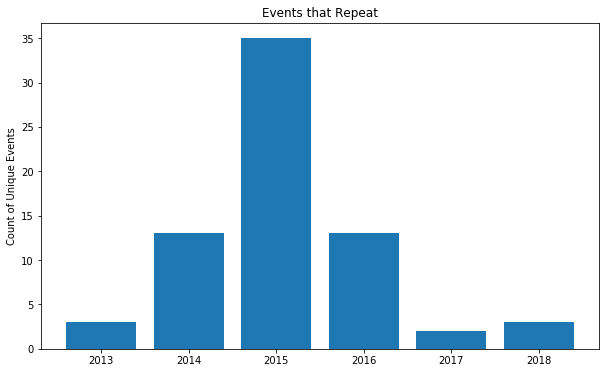

In [88]:
fig, ax = plt.subplots(figsize=(10,6))
bars= duplev['year']
ypos= range(0,len(bars))
ax.bar(ypos,duplev[0])
plt.title('Events that Repeat')
plt.xticks(ypos,bars)
plt.ylabel('Count of Unique Events')
plt.show();

In [89]:
uniqev= t[~t.duplicated('title')][['year','title','description','cost_free','event_organizer']].sort_values('title').shape
#Computes the unique titles across all the years

In [90]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)

,index,category
0,Ocean Breeze Summer Fitness,434
1,Outdoor Fitness,421
2,Fitness,387
3,Ocean Breeze Track & Field Athletic Complex,293
4,Best for Kids,170
5,Games,99
6,Waterfront,90
7,Running,73
8,Sports,71
9,Seniors,55


C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


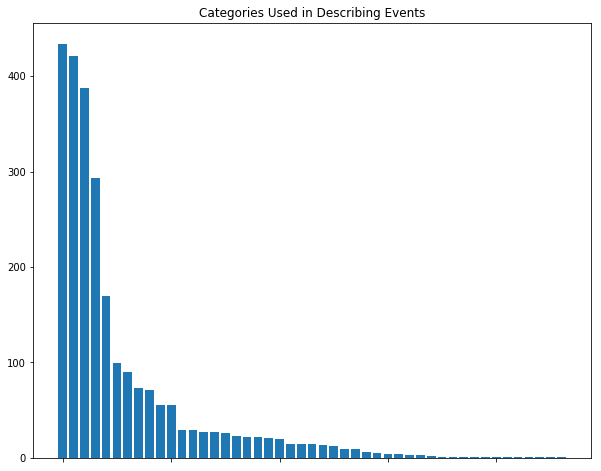

In [91]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom='off')
plt.title('Categories Used in Describing Events')
plt.show();

In [92]:
table.iloc[0,0]

'Ocean Breeze Summer Fitness'

By title, there are {{uniqev[0]}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. As the table above demonstrates, most of these events fall under the descriptive categories: 
* {{table.iloc[0,0]}} 
* {{table.iloc[1,0]}}
* {{table.iloc[2,0]}}
* {{table.iloc[3,0]}}
* {{table.iloc[4,0]}}
* {{table.iloc[5,0]}}.

In [93]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
529,2013,76492.0,Back to the Beach,<p>\tCome celebrate and head Back To the Beach...,NaN
662,2013,76434.0,Beach Volleyball,Courts will be set up by the Turtle Fountain.&...,Courts will be set up by the Turtle Fountain. ...
878,2013,78583.0,Bocce Tournament,<p>\tHead over to South Beach for the The Bocc...,For seniors only. It is a twelve team double e...
1123,2013,76488.0,Castles in the Sand,<p>\tEver dreamed of having your own castle?&n...,Ever dreamed of having your own castle? Then c...
748,2013,76487.0,Kite in Flight,<p>\tJoin us and&nbsp;make your own kite and w...,Join us and make your own kite and watch it so...
982,2013,68359.0,Learn to Ride: Midland Playground,<p>\tPrepare your child to experience&nbsp;bea...,Prepare your child to experience beautiful spr...
206,2013,76306.0,Seahorse Boogie,Bring the whole family and join us at the Gaze...,Bring the whole family and join us at the Gaze...
189,2013,76310.0,Senior Prom,Dance the night away in our Senior Prom Dance ...,Dance the night away in our Senior Prom Dance ...
1209,2013,77279.0,Turkey and Waterfowl Viewing,<p>\tScores of wild turkeys roam freely around...,Scores of wild turkeys roam freely around Stat...
425,2014,98717.0,Asian Fest 2014,<p>The mission of this festival is to bring to...,The mission of this festival is to bring toget...


In [94]:
y2013= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2013,axis=1,ascending=False).iloc[0,0:10]
y2013= y2013.reset_index()
y2013

,title,2013
0,Beach Volleyball,5.0
1,Back to the Beach,2.0
2,Learn to Ride: Midland Playground,2.0
3,Bocce Tournament,1.0
4,Castles in the Sand,1.0
5,Kite in Flight,1.0
6,Seahorse Boogie,1.0
7,Senior Prom,1.0
8,Turkey and Waterfowl Viewing,1.0
9,2nd Annual Ocean Breeze Beach Soccer Tournament,NaN


In [95]:
y2018= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2018,axis=1,ascending=False).iloc[5,0:10]
y2018= y2018.reset_index()
y2018

,title,2018
0,Learn to Ride,3.0
1,"CANCELLED: Arts, Culture & Fun: Dance Away the...",2.0
2,Movies Under the Stars: Jaws,2.0
3,Animal of the Month Club: Northern Gannet,1.0
4,"Arts, Culture & Fun: Dance Away the Night with...",1.0
5,"Arts, Culture & Fun: Dance Away the Night: Sal...",1.0
6,"Arts, Culture & Fun: Make Music New York with ...",1.0
7,It's My Park at Franklin D. Roosevelt Boardwal...,1.0
8,Kids Week Staten Island: Coastal Ecology,1.0
9,Learn to Ride - Kids: Midland Beach (Staten Is...,1.0


Park events range from tours of the Beach Volleyball to "Learn to Ride," a learn-to-bike workshop. Overall, most events appear to encourage outdoor recreation and take advantage of the parks' beach setting. In 2013, the events that repeated the most were {{y2013.iloc[0,0]}}, {{y2013.iloc[2,0]}}, and {{y2013.iloc[3,0]}}. In 2018, the most frequent events still involved outdoor activity but also involved more artistic endeavors. For example, the top 3 most frequent events were: {{y2018.iloc[0,0]}}, {{y2018.iloc[1,0]}}, and {{y2018.iloc[2,0]}}. Although many events are beach-related, the above tables suggest that programming at {{name}} is quite varied.

In [96]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table

,index,event_organizer
0,NYC Parks,39
1,NYC Parks: Staten Island Recreation,26
2,NY Carousel,10
3,"Arts, Culture & Fun",9
4,Urban Park Rangers,3
5,Kayak Staten Island,3
6,Bike New York,1
7,Stewardship Team,1
8,New York City Department of Parks and Recreation,1
9,Staten Island Greenbelt Conservancy,1


In [97]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2
#Stakeholders by number of events organized

,index,event_organizer
0,NYC Parks,434
1,NYC Parks: Staten Island Recreation,32
2,NY Carousel,26
3,Kayak Staten Island,14
4,"Arts, Culture & Fun",12
5,Urban Park Rangers,3
6,Staten Island Recreation,3
7,NYC Parks: Ocean Breeze Athletic Complex,3
8,Bike New York,1
9,Staten Island Greenbelt Conservancy,1


Only a few of the top event organizers are local. {{table.iloc[0,0]}} organized the most events with {{table.iloc[0,1]}} uniquely titled events. {{table.iloc[1,0]}} is second with {{table.iloc[1,1]}} events. Most other events were organized by {{table.iloc[2,0]}}, {{table.iloc[3,0]}}, {{table.iloc[4,0]}}, and {{table.iloc[5,0]}}.

* Local vs. nonlocal analysis.

In [98]:
nonloc= [0,2,4,7,8,9,11,12,13] #based off of organizations that are not connected to Brooklyn
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= np.around(len(table2),decimals=2)

Assuming that all Staten Island-related organizations are local:
* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev[0]/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [104]:
name= sample[['SIGNNAME','ACRES']].iloc[4,0]
acres= sample[['SIGNNAME','ACRES']].iloc[4,1]

In [114]:
id= sample[['GISPROPNUM','SIGNNAME']].iloc[4,0]

In [115]:
sample[['TYPECATEGO','SIGNNAME']].iloc[4,0]

'Neighborhood Park'

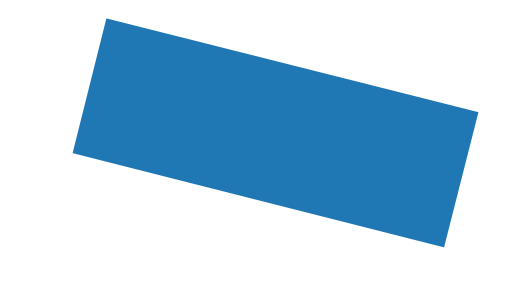

In [106]:
parks[parks['GISPROPNUM']==id].plot(figsize=(8,8))
plt.axis('off')
plt.savefig(r"M:\NY4P Metrics Research 18034\05_GRAPHICS\Charts Graphs Diagrams\park shapes\murray.pdf");

## 5 {{name}}

In [119]:
id

'Q141'

In [116]:
t= sampevents[sampevents['GISPROPNUM']==sample.iloc[4,0]]
t['date']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t['year']= t['date'].dt.year
numev= t[~t.duplicated('event_id')].shape[0]
#Creates a temporary dataframe for all events located to the specific park.

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [117]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()/6
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).sum()/6
#Counts the number of uniquely titled events

In [118]:
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[[2013,2017]]>1].count().reset_index()
duplevavg= y[y[[2013,2017]]>1].count().sum()/6
duplev13= duplev.iloc[0,1]
duplev17= duplev.iloc[1,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

{{name}} is a small neighborhood playground in Queens. {{name}} has {{acres}} acres. 
* The average number of events it hosts per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. 
* On average per year, it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. 
* Of these uniquely titled events, the average number of events that repeat is {{np.around(duplevavg,decimals=2)}}. 

To be specific, in 2013 there was {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in 2017 there were {{duplev17}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [122]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year.

,year,0
0,2013,1
1,2017,2


In [123]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2013,1
1,2017,3


In [124]:
duplev
#Repeating events by year

,year,0
0,2013,0
1,2017,1


In [125]:
uniqev= t[~t.duplicated('title')][['year','title','description','cost_free','event_organizer']].sort_values('title').shape
#Computes the unique titles across all the years

In [126]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)

,index,category
0,Volunteer,5
1,It's My Park,5


C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


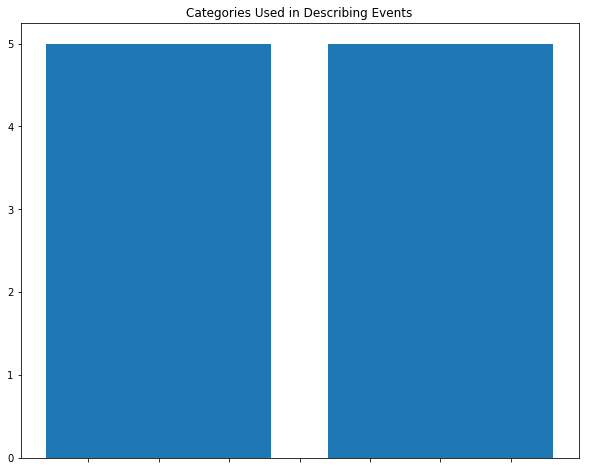

In [127]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom='off')
plt.title('Categories Used in Describing Events')
plt.show();

In [128]:
table.iloc[0,0]

'Volunteer'

By title, there are {{uniqev[0]}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. As the table above demonstrates, all of these events fall under two categories: 
* {{table.iloc[0,0]}} 
* {{table.iloc[1,0]}}

In [129]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
13151,2013,73135.0,It's My Park Day at John F. Murray Playground,"On It&#39;s My Park Day, join STOKED at John F...","On It's My Park Day, join STOKED at John F. Mu..."
13147,2017,157449.0,CANCELLED: It's My Park at Murray Playground,"<p class=""alert alert-error"">Please note: this...","This It's My Park season, volunteer with Queen..."
13149,2017,154594.0,It's My Park at Murray Playground,"<p>This It&#39;s My Park season, volunteer wit...","This It's My Park season, volunteer with Queen..."


In [130]:
y2013= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2013,axis=1,ascending=False).iloc[0,0:1]
y2013= y2013.reset_index()
y2013

,title,2013
0,It's My Park Day at John F. Murray Playground,1.0


In [135]:
y2017= t[~t.duplicated('event_id')]['title'].value_counts().sort_values(ascending=False)
y2017

It's My Park at Murray Playground                2
It's My Park Day at John F. Murray Playground    1
CANCELLED: It's My Park at Murray Playground     1
Name: title, dtype: int64

Park events are almost exclusively volunteer "It's My Park" events. In 2013, the only event to occur was {{y2013.iloc[0,0]}}. In 2017, there were 2 more events that followed a similar theme: {{y2017.iloc[0,0]}} and {{y2017.iloc[1,0]}}.

In [895]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table

,index,event_organizer
0,Queens Paideia School,2
1,Partnerships for Parks,1


In [896]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2
#Stakeholders by number of events organized

,index,event_organizer
0,Queens Paideia School,2
1,Murray Park Neighbors,1
2,Partnerships for Parks,1


The primary event organizer does seem to be local. {{table.iloc[0,0]}} organized the most events with {{table.iloc[0,1]}} uniquely titled events. The other organizer is the {{table.iloc[1,0]}} with {{table.iloc[1,1]}} additional event.

* Local vs. nonlocal analysis.

In [897]:
nonloc= [1,2] #based off of organizations that are not connected to Brooklyn
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= np.around(len(table2),decimals=2)

* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev[0]/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [149]:
name= 'Jackie Robinson Playground'
acres= 1

In [148]:
events.sample(10)['title']

109516                          The Bronx Meets East Africa
19069                         Summer on the Hudson: SunGaze
236730               Movies Under the Stars: Justice League
71088                Discovery Hike: Fall Forest Experience
232847           Special Tour: From the Cellar to the Attic
103318               Central Park Tour: Legendary Landmarks
40885                         It's My Park at McCarren Park
178428                  Movies Under the Stars: House Party
81536     Parks Build Healthy Communities Grant: Info Se...
116412               Storefront Science: Tree Identifcation
Name: title, dtype: object

## 6 {{name}}

In [152]:
t= events[events['GISPROPNUM']=='M073']
t['date']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t['year']= t['date'].dt.year
numev= t[~t.duplicated('event_id')].shape[0]
#Creates a temporary dataframe for all events located to the specific park.

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [153]:
t['title'].value_counts()

Charles Addams Family and Friends Exhibit                                                    164
Yoga At Morris-Jumel Mansion                                                                 146
Yoga with Awesome Asana                                                                      135
Free Yoga Class                                                                               90
Roger Morris Park Garden Volunteer Day                                                        87
Garden Camp for Kids                                                                          84
Paranormal Investigation                                                                      54
Free Tai Chi with Julio Cortes                                                                54
The Alving Estate - Immersive Theater                                                         48
Fancy Me Mad                                                                                  48
Garden Camp for Kids at Morris

In [141]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()/6
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).sum()/6
#Counts the number of uniquely titled events

In [142]:
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[[2013,2014,2015,2016,2017]]>1].count().reset_index()
duplevavg= y[y[[2013,2014,2015,2016,2017]]>1].count().sum()/6
duplev13= duplev.iloc[0,1]
duplev17= duplev.iloc[4,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

KeyError: '[2016, 2017, 2014, 2015] not in index'

{{name}} is in Queens. The park is located next to the cooperative housing community Rochdale Village. It has a long history as a racetrack. In 1903, it opened its doors as a one-mile oval track for horse racing with 9,000 stadium-style seats. The racetrack closed in 1959 (“Rochdale Park,” NYC Parks).  {{name}} has {{acres}} acres. 
* The average number of events it hosts per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. 
* On average per year, it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. 
* Of these uniquely titled events, the average number of events that repeat is {{np.around(duplevavg,decimals=2)}}. 

To be specific, in 2013 there were {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in 2018 there were {{duplev17}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [902]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year.

,year,0
0,2013,3
1,2014,2
2,2015,3
3,2016,5
4,2017,4


In [903]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2013,3
1,2014,2
2,2015,3
3,2016,5
4,2017,4


In [904]:
duplev
#Number of repeating events by year

,year,0
0,2013,0
1,2014,0
2,2015,0
3,2016,0
4,2017,0


In [905]:
uniqev= t[~t.duplicated('title')][['year','title','description','cost_free','event_organizer']].sort_values('title').shape
#Computes the unique titles across all the years

In [906]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)

,index,category
0,Best for Kids,15
1,Film,15
2,Free Summer Movies,11
3,Movies Under the Stars,11
4,Festivals,3
5,City Parks Foundation,2
6,Games,2
7,Volunteer,1
8,Fitness,1
9,Theater,1


C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


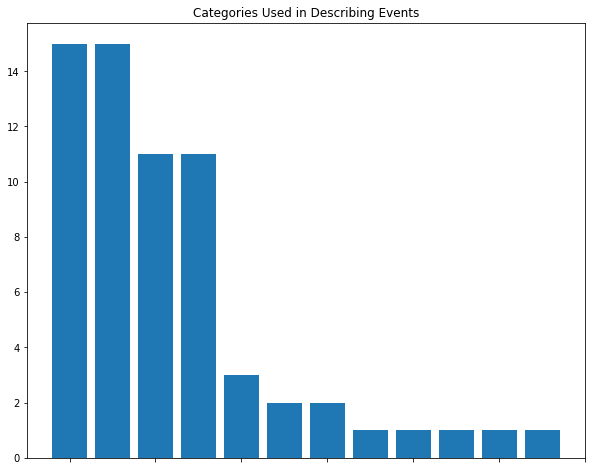

In [907]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom='off')
plt.title('Categories Used in Describing Events')
plt.show();

In [908]:
table.iloc[0,0]

'Best for Kids'

By title, there are {{uniqev[0]}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. As the table above demonstrates, all of these events fall under two categories: 
* {{table.iloc[0,0]}} 
* {{table.iloc[1,0]}}

In [909]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
13207,2013,74080.0,CityParks PuppetMobile Presents Little Red's Hood,"<p class=""mti_font_element"">\t<em class=""mti_f...",Little Red's Hood is a fresh retelling of the ...
13166,2013,73174.0,Movie Night: Hotel Transylvania,<p>\tBring a chair or blanket and enjoy Hotel ...,Bring a chair or blanket and enjoy Hotel Trans...
13192,2013,79575.0,Super Saturday Open House,Come join us and learn about fitness programs ...,Come join us and learn about fitness programs ...
13204,2014,93439.0,Movie Night: Frozen,<p>\tStart off the evening with crafts and gam...,Bring a chair or blanket and join us for a sho...
13185,2014,87404.0,SummerStage Kids Presents: Puppetmobile,City Parks Foundation is excited to announce t...,City Parks Foundation is excited to announce t...
13163,2015,109418.0,Movie Night: Annie,<p>Bring a chair or blanket and join us for a ...,Bring a chair or blanket and join us for a sho...
13209,2015,120801.0,Movies Under the Stars: Hotel Transylvania,<p>Join NYC Parks&nbsp;and the New York City M...,Join NYC Parks and the New York City Mayor's O...
13193,2015,117741.0,Movies Under the Stars: The Muppets Take Manha...,<p>Join NYC Parks&nbsp;and the New York City M...,Join NYC Parks and the New York City Mayor's O...
13183,2016,128985.0,After School Festival,<p>Join us&nbsp;for some fun activities such a...,"After school ends, join us for some fun activi..."
13177,2016,127562.0,CANCELLED: Movies Under The Stars: Minions,"<p class=""alert alert-error"">Please note: this...",Pierre Coffin and Kyle Balda co-direct this an...


In [910]:
y2013= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2013,axis=1,ascending=False).iloc[0,0:3]
y2013= y2013.reset_index()
y2013

,title,2013
0,CityParks PuppetMobile Presents Little Red's Hood,1.0
1,Movie Night: Hotel Transylvania,1.0
2,Super Saturday Open House,1.0


In [911]:
y2017= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2017,axis=1,ascending=False).iloc[4,0:4]
y2017= y2017.reset_index()
y2017

,title,2017
0,Afterschool Festival,1.0
1,CANCELLED: Afterschool Festival,1.0
2,CANCELLED: Movie Under the Stars: Sing,1.0
3,It's My Park at Rochdale Park,1.0


Park events are either youth entertainment (e.g. a puppet show, movie night, or after school festival). In 2013, the three events to occur were {{y2013.iloc[0,0]}}, {{y2013.iloc[1,0]}}, and {{y2013.iloc[2,0]}}. In 2017, the four events to occur were: {{y2017.iloc[0,0]}}, {{y2017.iloc[1,0]}}, {{y2017.iloc[2,0]}}, and  {{y2017.iloc[3,0]}}.

In [912]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table

,index,event_organizer
0,NYC Parks: Queens Recreation,8
1,Queens Recreation,4
2,City Parks Foundation,2
3,NYC Parks,2
4,Friends of Rochdale Park,1


In [913]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2
#Stakeholders by number of events organized

,index,event_organizer
0,NYC Parks: Queens Recreation,8
1,Queens Recreation,4
2,City Parks Foundation,2
3,NYC Parks,2
4,Friends of Rochdale Park,1


The top two event organizers do seem to be local. {{table.iloc[0,0]}} organized the most events with {{table.iloc[0,1]}} uniquely titled events. The other organizer is {{table.iloc[1,0]}} with {{table.iloc[1,1]}} events. {{table.iloc[4,0]}} is also local.

* Local vs. nonlocal analysis.

In [914]:
nonloc= [2,3] #based off of organizations that are not connected to Brooklyn
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= np.around(len(table2),decimals=2)

Assuming Queens-specific organizations are local,
* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev[0]/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [915]:
events['GISPROPNUM']=events['park_id']
sampevents= pd.merge(events,sample,on='GISPROPNUM',how='right')
name= sample[['SIGNNAME','ACRES']].iloc[6,0]
acres= sample[['SIGNNAME','ACRES']].iloc[6,1]

## 7 {{name}}

In [916]:
t= sampevents[sampevents['GISPROPNUM']==sample.iloc[6,0]]
t['date']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t['year']= t['date'].dt.year
numev= t[~t.duplicated('event_id')].shape[0]
#Creates a temporary dataframe for all events located to the specific park.

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [917]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()/6
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).sum()/6
#Counts the number of uniquely titled events

In [918]:
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[[2013,2016,2017]]>1].count().reset_index()
duplevavg= y[y[[2013,2016,2017]]>1].count().sum()/6
duplev13= duplev.iloc[0,1]
duplev17= duplev.iloc[2,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

{{name}} in Queens is a small playground of {{acres}} acres. It is named for the surrounding neighborhood, developed by Frederick Denton in the 1880s. Since its opening in 1959, the playground has been jointly operated with the Board of Education. It is located next to Renaissance Middle School.
* The average number of events it hosts per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. 
* On average per year, it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. 
* Of these uniquely titled events, the average number of events that repeat is {{np.around(duplevavg,decimals=2)}}. 

To be specific, in 2013 there were {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in 2018 there were {{duplev17}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [919]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year.

,year,0
0,2013,1
1,2016,1
2,2017,1


In [920]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2013,1
1,2016,1
2,2017,2


In [921]:
duplev
#Number of repeating events by year (by unique title--i.e. 1 implies that 1 event repeated, not that it occurred only once)

,year,0
0,2013,0
1,2016,0
2,2017,1


In [922]:
uniqev= t[~t.duplicated('title')][['year','title','description','cost_free','event_organizer']].sort_values('title').shape
#Computes the unique titles across all the years

In [923]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)

,index,category
0,It's My Park,5
1,Volunteer,5


C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


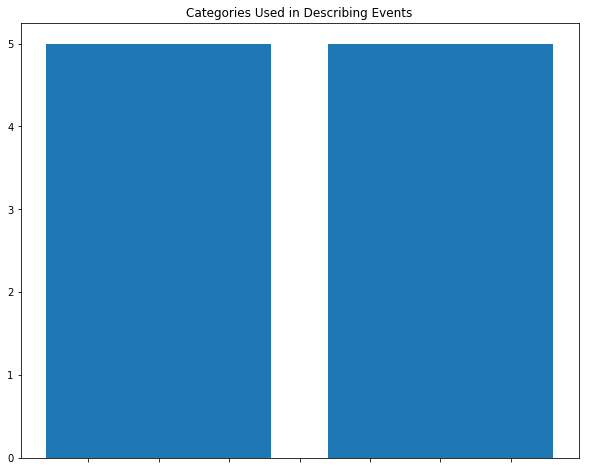

In [924]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom='off')
plt.title('Categories Used in Describing Events')
plt.show();

In [925]:
table.iloc[0,0]

"It's My Park"

By title, there are {{uniqev[0]}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. As the table above demonstrates, all of these events fall under two categories: 
* {{table.iloc[0,0]}} 
* {{table.iloc[1,0]}}

In [926]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
13221,2013,73134.0,It's My Park Day at Hollis Playground (JHS 192),"On It&#39;s My Park Day, come out to Hollis Pl...","On It's My Park Day, come out to Hollis Playgr..."
13229,2016,138791.0,It's My Park at Hollis Playground,"<p>This It&#39;s My Park season, volunteer wit...","This It's My Park season, volunteer with Holli..."
13225,2017,147479.0,It's My Park at Hollis Playground,"<p>This It&#39;s My Park season, volunteer wit...","This It's My Park season, volunteer with Queen..."


In [927]:
y2013= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2013,axis=1,ascending=False).iloc[0,0:1]
y2013= y2013.reset_index()
y2013

,title,2013
0,It's My Park Day at Hollis Playground (JHS 192),1.0


In [928]:
y2017= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2017,axis=1,ascending=False).iloc[2,0:1]
y2017= y2017.reset_index()
y2017

,title,2017
0,It's My Park at Hollis Playground,2.0


Park events are exclusively "It's My Park Day" events. In 2013, the one event to occur was {{y2013.iloc[0,0]}}. In 2017, the two events to occur were {{y2017.iloc[0,0]}}.

In [929]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table

,index,event_organizer
0,Partnerships for Parks,1
1,Queens United Program For Youth Development Co...,1


In [930]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2
#Stakeholders by number of events organized

,index,event_organizer
0,Hollis Local Development Committee,2
1,Partnerships for Parks,1
2,Queens United Program For Youth Development Co...,1


There are only two organizers. {{table.iloc[0,0]}} is a city-wide organization. The other organizer is more local {{table.iloc[1,0]}}.

* Local vs. nonlocal analysis.

In [931]:
nonloc= [1] #based off of organizations that are not connected to Brooklyn
nonlocsh= table2.loc[nonloc,'event_organizer'].sum()/table2['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= np.around(len(table2),decimals=2)

Assuming Queens-specific organizations are local,
* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev[0]/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [932]:
events['GISPROPNUM']=events['park_id']
sampevents= pd.merge(events,sample,on='GISPROPNUM',how='right')
name= sample[['SIGNNAME','ACRES']].iloc[7,0]
acres= sample[['SIGNNAME','ACRES']].iloc[7,1]

## 8 {{name}}

In [933]:
t= sampevents[sampevents['GISPROPNUM']==sample.iloc[7,0]]
t['date']= pd.to_datetime(t['date'], format='%m/%d/%Y')
t['year']= t['date'].dt.year
numev= t[~t.duplicated('event_id')].shape[0]
#Creates a temporary dataframe for all events located to the specific park.

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [934]:
avg= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()/6
#Removes repeated event_ids, and computes the mean number of events.
avg= np.around(avg,decimals=2)
total= t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index().sum()
#Removes repeated event_ids, and computes the total number of events.
avgtitle= t[~t.duplicated('event_id')].sort_values('year')
#Sorts all events by the year
avgtitleyr= avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).sum()/6
#Counts the number of uniquely titled events

In [935]:
avgtitle.groupby('year')['title'].value_counts().unstack().count(axis=1).reset_index()
#Uniquely titled events by year.

,year,0
0,2013,14
1,2014,10
2,2015,3
3,2016,13
4,2017,4
5,2018,9


In [936]:
y= avgtitle.groupby('year')['title'].value_counts().unstack()
y= y.transpose()
duplev= y[y[[2013,2014,2015,2016,2017,2018]]>1].count().reset_index()
duplevavg= y[y[[2013,2014,2015,2016,2017,2018]]>1].count().sum()/6
duplev13= duplev.iloc[0,1]
duplev18= duplev.iloc[5,1]
#Calculates the unique events that repeat (i.e. not how many events were there, but how many titles refer to repeating events).

The {{name}} in lower Manhattan is home to {{acres}} acres. 
* The average number of events it hosts per year is {{avg[1]}} with a total of {{total[1]}} events over the past six years. 
* On average per year, it hosts {{np.around(avgtitleyr,decimals=2)}} uniquely titled events. 
* Of these uniquely titled events, the average number of events that repeat is {{np.around(duplevavg,decimals=2)}}. 

To be specific, in 2013 there were {{np.around(duplev13,decimals=2)}} uniquely titled repeating events and in 2018 there were {{duplev18}}.

* The average number of uniquely titled events per year per acre is {{np.around(avgtitleyr/acres,decimals=2)}}.
* The average number of events per year per acre is {{np.around(avg[1]/acres,decimals=2)}}.
* The number of total events per acre is {{np.around(numev/acres,decimals=2)}}.

In [937]:
t[~t.duplicated('event_id')].groupby('year').agg({'event_id':'count'}).reset_index()
#Total events by year

,year,event_id
0,2013,21
1,2014,15
2,2015,17
3,2016,16
4,2017,6
5,2018,10


In [938]:
duplev
#Number of repeating events by year (by unique title--i.e. 1 implies that 1 event repeated, not that it occurred only once)

,year,0
0,2013,5
1,2014,2
2,2015,2
3,2016,2
4,2017,1
5,2018,1


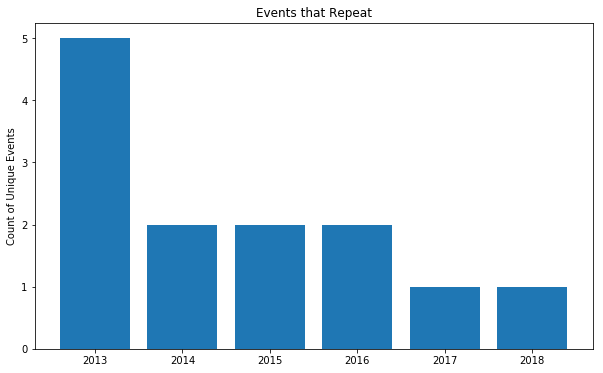

In [939]:
fig, ax = plt.subplots(figsize=(10,6))
bars= duplev['year']
ypos= range(0,len(bars))
ax.bar(ypos,duplev[0])
plt.title('Events that Repeat')
plt.xticks(ypos,bars)
plt.ylabel('Count of Unique Events')
plt.show();

In [940]:
uniqev= t[~t.duplicated('title')][['year','title','description','cost_free','event_organizer']].sort_values('title').shape
#Computes the unique titles across all the years

In [941]:
table= t['category'].value_counts().reset_index()
uniqcat= table.shape[0]
table.head(10)

,index,category
0,Theater,27
1,Free Summer Theater,27
2,Best for Kids,23
3,Sports,23
4,Concerts,22
5,City Parks Foundation,22
6,SummerStage,22
7,Free Summer Concerts,21
8,Accessible,16
9,Education,12


C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


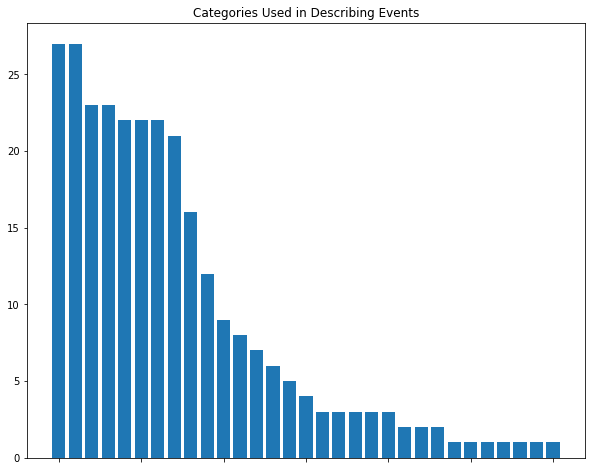

In [942]:
fig, ax = plt.subplots(figsize=(10,8))
bars= table['index']
ypos= range(0,len(bars))
ax.bar(ypos,table['category'])
plt.tick_params(labelbottom='off')
plt.title('Categories Used in Describing Events')
plt.show();

In [943]:
table.iloc[0,0]

'Theater'

By title, there are {{uniqev[0]}} uniquely titled events held in the park for all years included in the data. Of these events, there are {{uniqcat}} unique categories used to describe them. As the table above demonstrates, most of these events are either sports or theater-related. Many fall under categories: 
* {{table.iloc[0,0]}} 
* {{table.iloc[1,0]}}
* {{table.iloc[2,0]}}
* {{table.iloc[3,0]}}
* {{table.iloc[4,0]}}

In [944]:
t[~t.duplicated(['year','title'])][['year','event_id','title','description','snippet']].sort_values(['year','title'])
#Sorts all data by uniquely titled events for each year.

,year,event_id,title,description,snippet
13116,2013,70035.0,"""Wild Style 30th Anniversary Celebration"" in a...",<p>\tJoin SummerStage for a special 30<sup>th<...,Join SummerStage for a special 30th anniversar...
12865,2013,75940.0,American Thymele Theatre Presents: 2013 New Yo...,"<span class=""medium"" id=""Description"">Hippolyt...",American Thymele Theatre presents Hippolytus b...
13054,2013,70020.0,Comedy Central Live: The Dark Lords of Comedy ...,<p>\tMike Lawrence is a New York City based co...,Mike Lawrence is a New York City based comedia...
12979,2013,70029.0,Hip-Hop Theater: King Kong,"<p>\t<span style=""font-size: 8pt; font-family:...",King Kong is an original music/dance/comedy sp...
12873,2013,79875.0,Imagining East River Park,<p>\tHow do you imagine East River Park?</p><p...,How do you imagine East River Park? We invite ...
12885,2013,71740.0,It's My Park Day at East River Park,"On It&#39;s My Park Day, join the East River P...","On It's My Park Day, join the East River Park ..."
13058,2013,70038.0,Larry Harlow and The Latin Legends Band / DJ s...,"<p>\tWith over 40 years in the music industry,...","With over 40 years in the music industry, Larr..."
12943,2013,70037.0,Mac DeMarco built by meanred,"<p>\t<strong>Mac Demarco</strong>, a 21-year o...","Mac Demarco, a 21-year old Canadian, released ..."
12997,2013,70036.0,Pete Rock vs. DJ Premier hosted by Lyricist Lo...,<p>\tSummerStage celebrates the acclaimed Hip-...,SummerStage celebrates the acclaimed Hip-Hop b...
12883,2013,77254.0,Play-diem Fall Tour Free Concert,Join Play-diem this Tuesday at the East River ...,Join Play-diem this Tuesday at the East River ...


In [945]:
y2013= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2013,axis=1,ascending=False).iloc[0,0:10]
y2013= y2013.reset_index()
y2013

,title,2013
0,American Thymele Theatre Presents: 2013 New Yo...,3.0
1,Hip-Hop Theater: King Kong,3.0
2,It's My Park Day at East River Park,2.0
3,Play-diem Fall Tour Free Concert,2.0
4,SummerStage Theater: Diablo Love,2.0
5,"""Wild Style 30th Anniversary Celebration"" in a...",1.0
6,Comedy Central Live: The Dark Lords of Comedy ...,1.0
7,Imagining East River Park,1.0
8,Larry Harlow and The Latin Legends Band / DJ s...,1.0
9,Mac DeMarco built by meanred,1.0


In [946]:
y2018= t[~t.duplicated('event_id')].groupby('year')['title'].value_counts().unstack().sort_values(2018,axis=1,ascending=False).iloc[5,0:9]
y2018= y2018.reset_index()
y2018

,title,2018
0,New York Euripides Summer Festival Presents 'S...,2.0
1,BYO Bin Worm Compost Workshop,1.0
2,CANCELLED: New York Euripides Summer Festival ...,1.0
3,City Parks Foundation's SummerStage presents J...,1.0
4,City Parks Foundation's SummerStage presents P...,1.0
5,City Parks Foundation's SummerStage presents P...,1.0
6,City Parks Foundation's SummerStage presents W...,1.0
7,Saltwater Fishing,1.0
8,WormShop for Educators: An Introduction to Ver...,1.0


Park events range from Comedy Central Live to Worm Compost workshop. However, most events are either theater performances or concerts. In 2013, the most frequent events were: {{y2013.iloc[0,0]}}, {{y2013.iloc[1,0]}}, and {{y2013.iloc[2,0]}}. In 2018, {{y2018.iloc[0,0]}} occurred twice. But Summerstage events seem to be more frequent.

In [948]:
table= t[~t.duplicated('title')]['event_organizer'].value_counts().reset_index()
table

,index,event_organizer
0,City Parks Foundation,20
1,Bike New York,8
2,American Thymele Theatre,6
3,Play-diem Tour,2
4,Partnerships for Parks,2
5,LES Ecology Center,2
6,Manhattan Recreation,2
7,East River Park Coalition,2
8,"City Parks Foundation,NYC-Parks",1
9,Urban Park Rangers,1


In [949]:
table2= t[~t.duplicated('event_id')]['event_organizer'].value_counts().reset_index()
table2
#Stakeholders by number of events organized

,index,event_organizer
0,City Parks Foundation,26
1,American Thymele Theatre,15
2,"City Parks Foundation,NYC-Parks",13
3,Bike New York,9
4,Urban Park Rangers,3
5,Play-diem Tour,3
6,Partnerships for Parks,3
7,LES Ecology Center,2
8,Manhattan Recreation,2
9,East River Park Coalition,2


Most of the organizers do not seem to be local. Only {{table.iloc[5,0]}} and {{table.iloc[7,0]}} have direct connections to the Lower East Side/East River Park Areas. Collectively, they have only organized {{table.iloc[5,1] + table.iloc[7,1]}} events.

* Local vs. nonlocal analysis.

In [950]:
nonloc= [0,1,2,3,4,5,6,10] #based off of organizations that are not connected to Brooklyn
nonlocsh= table.loc[nonloc,'event_organizer'].sum()/table['event_organizer'].sum()
nonlocsh= np.around(nonlocsh,decimals=2)
locsh= np.around(1-nonlocsh,decimals=2)
uniqorg= np.around(len(table),decimals=2)

Assuming Manhattan-specific organizations are local,
* The non-local stakeholder share is {{nonlocsh}}. // The local stakeholder share is {{locsh}}.
* The number of uniquely titled events per stakeholder is {{np.around(uniqev[0]/uniqorg,decimals=2)}}.
* The number of total events per stakeholder is {{np.around(numev/uniqorg,decimals=2)}}.

Note: stakeholder share is calculated using table2 (above): stakeholder share of all events organized, not uniquely titled events.

In [556]:
events['GISPROPNUM']=events['park_id']
sampevents= pd.merge(events,sample,on='GISPROPNUM',how='right')
name= sample[['SIGNNAME','ACRES']].iloc[8,0]
acres= sample[['SIGNNAME','ACRES']].iloc[8,1]

## 9 {{name}}

* This park has no events listed in this data set.
* This 1.635-acre park in Harlem has never had a permitted event in the seven years of recorded data. However, the park’s name does recall the history of the area as a racecourse for horse-drawn carriages in the 19th century. The playground is right next to the Harlem River Drive (“Harlem Lane Playground,” NYC Parks).

In [557]:
events['GISPROPNUM']=events['park_id']
sampevents= pd.merge(events,sample,on='GISPROPNUM',how='right')
name= sample[['SIGNNAME','ACRES']].iloc[9,0]
acres= sample[['SIGNNAME','ACRES']].iloc[9,1]

## 10 {{name}}

* This park has no events listed in this data set.
* Beach 9 Playground is a 4.863-acre park in Queens and has also never had a permitted event in the seven years of recorded data. One reason may be its proximity to the Rockaway Beach and Boardwalk, which has eight playgrounds. Events may be located to Rockaway Beach and Boardwalk, as opposed to playgrounds. It seems there are no events, even though these same events are accessible to playground attendees (“Rockaway Beach and Boardwalk Playgrounds,” NYC Parks).